# Machine-learning-project
<br>

**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей, 
3. Построение моделей для прогнозирования оттока, 
4. Сравнение качества полученных моделей. 

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Codebook
<br>
`telecom_users.csv` содержит следующие значения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [ ]:
# Вызов библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Загрузка данных
# df_telecom_users = pd.read_csv('telecom_users.csv')
df_telecom_users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/telecom_users.csv')
df_telecom_users = df_telecom_users.drop('Unnamed: 0', axis=1)
df_telecom_users.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [ ]:
df_telecom_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object 


В данных нет NaN значений. <br>
<br>
Видим, что данные в столбце *SeniorCitizen* имеют тип int, но они представляют собой категориальные данные (0 или 1).
В столбце *TotalCharges* данные строкового типа, хотя в действительности это значения типа float. Изменим тип данных в ранееназванных столбцах.<br>
<br>
В результате попытки изменения типа данных было выяснено, что в данных, в частности в столбце *TotalCharges*, присутствуют пропущенные значения замаскировнные под пробелы. Заменим эти значения на tenure*MonthlyCharges.

In [ ]:
# Преобразование типов данных столбца SeniorCitizen
df_telecom_users.at[df_telecom_users['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
df_telecom_users.at[df_telecom_users['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'

In [ ]:
# Заполнение ячеек в столбце TotalCharges 
df_telecom_users.TotalCharges[
    df_telecom_users.TotalCharges == ' '
] = df_telecom_users.MonthlyCharges[
    df_telecom_users.TotalCharges == ' '
] * df_telecom_users.tenure[
    df_telecom_users.TotalCharges == ' '
]
df_telecom_users.TotalCharges = df_telecom_users.TotalCharges.astype('float')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Показатели количественных признаков
df_telecom_users.describe(include='number')

,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000
mean,32.468760,64.802213,2294.221559
std,24.516391,30.114702,2274.164124
min,0.000000,18.250000,0.000000
25%,9.000000,35.650000,401.587500
50%,29.000000,70.400000,1408.575000
75%,56.000000,89.900000,3841.500000
max,72.000000,118.750000,8684.800000


In [ ]:
# Список количественных признаков
quantity_columns = df_telecom_users.describe(include='number').columns
quantity_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

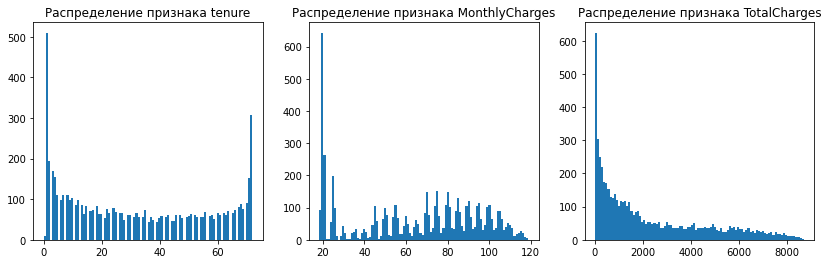

In [ ]:
# Посмотрим распределение количественных признаков
f, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].hist(df_telecom_users['tenure'], bins=100)
ax[0].set_title('Распределение признака tenure')

ax[1].hist(df_telecom_users['MonthlyCharges'], bins=100)
ax[1].set_title('Распределение признака MonthlyCharges')

ax[2].hist(df_telecom_users['TotalCharges'], bins=100)
ax[2].set_title('Распределение признака TotalCharges')

plt.show()

Видим, что распределение признаков далеко от нормального.

In [ ]:
# Почистим данные от несущественного признака
df_telecom_users = df_telecom_users.drop('customerID', axis=1)

In [ ]:
# Показатели качеcтвенных признаков
quality_data_describe = df_telecom_users.describe(include=['object'])
quality_data_describe

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,5020,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


In [ ]:
# Список качествунных признаков
quality_columns = quality_data_describe.columns
quality_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

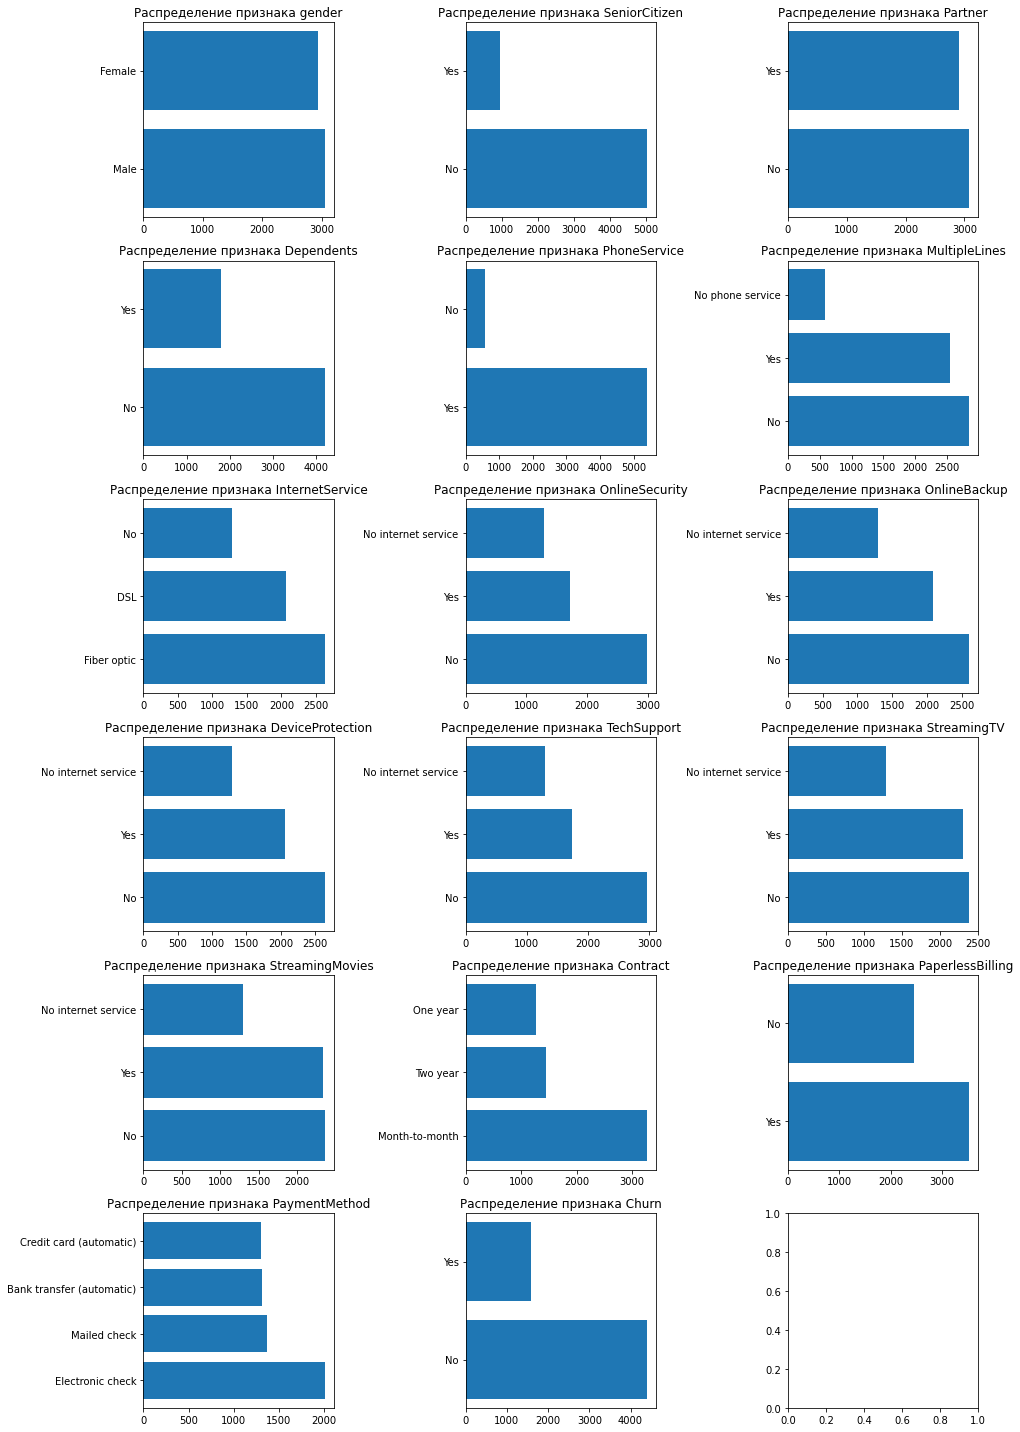

In [ ]:
# Посмотрим распределение качественных признаков
f, ax = plt.subplots(6, 3, figsize=(14, 20))
for ax, column in zip(ax.ravel(), quality_columns):
    ax.barh(df_telecom_users[column].value_counts().index,
            width=df_telecom_users[column].value_counts().values)
    ax.set_title(f'Распределение признака {column}')

plt.tight_layout()
plt.show()

# 2. Исследование зависимостей и формулирование гипотез

In [ ]:
# Скопируем датафрейм
df_telecom_users_for_analysis = df_telecom_users.copy()

1 Посмотрим распределение признака Churn (отток) внутри каждого признака.

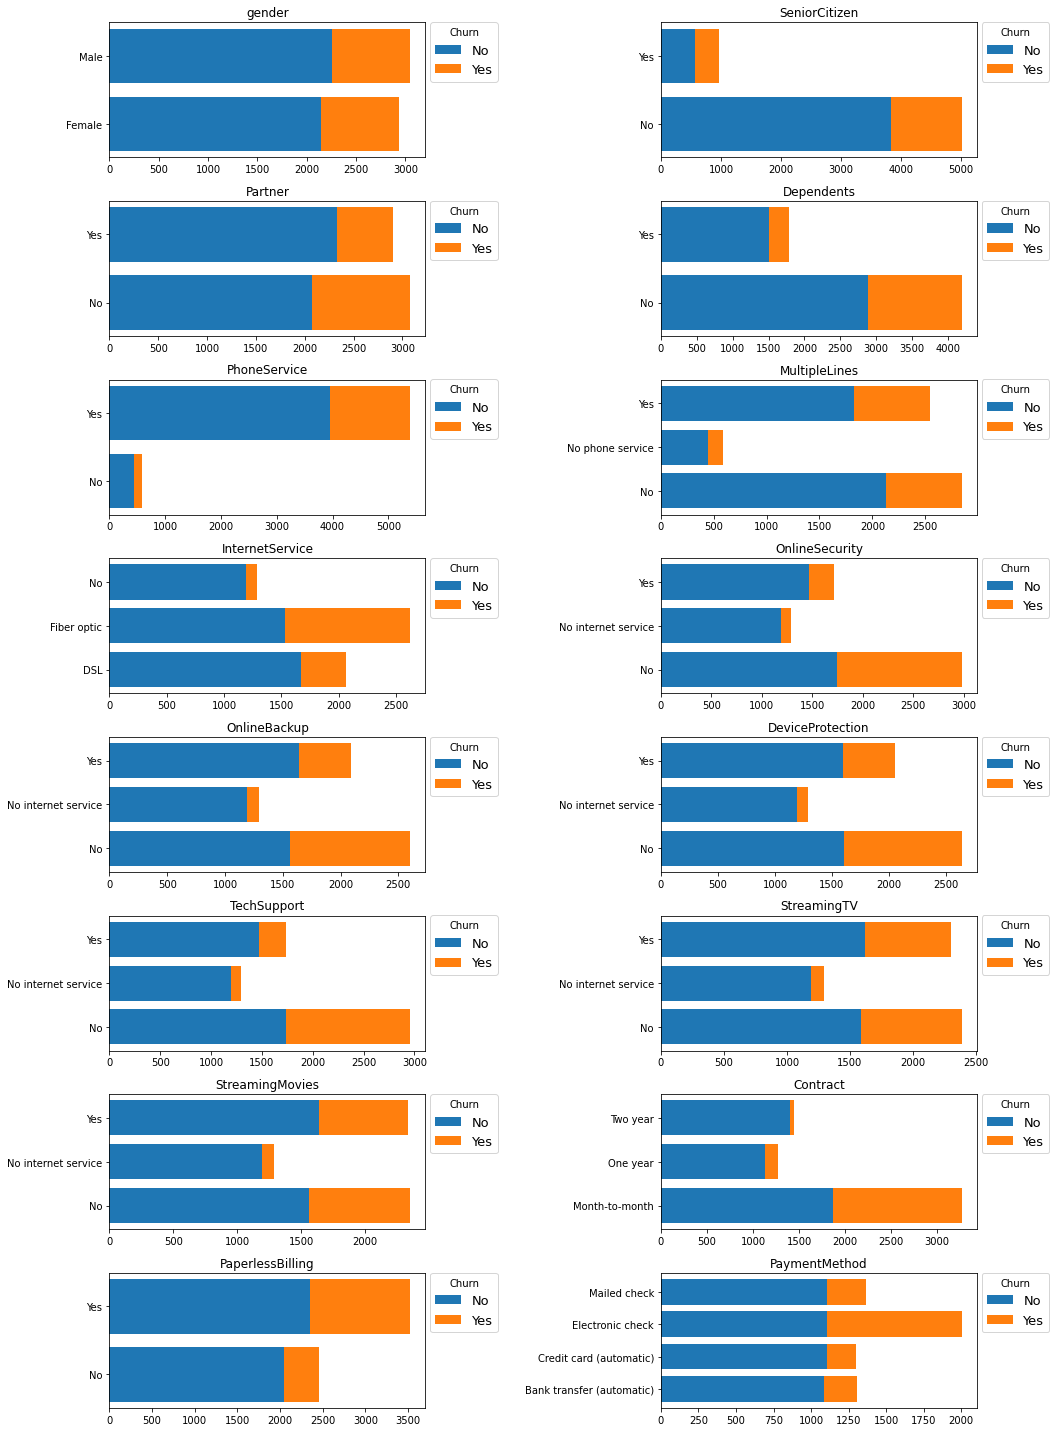

In [ ]:
fig, ax = plt.subplots(8,2, figsize=(15,20))
# цикл перебирающих столбцы
for ax, column in zip(ax.ravel(), quality_columns[:16]):
    # агрегация данных
    current_grouped_df = df_telecom_users_for_analysis.groupby([column, 'Churn'])['Churn']\
        .count()\
        .unstack('Churn')
    start = 0
    # цикл перебирающих столбцы и рисующий бары
    for yes_no_column in current_grouped_df.columns:
        ax.barh(y=current_grouped_df.index, 
                width=current_grouped_df[yes_no_column], 
                left=start, 
                label=yes_no_column)
        start = current_grouped_df[yes_no_column]
    ax.set_title(column)
    ax.legend(title='Churn', loc=1, bbox_to_anchor=(1.25, 1.05), fontsize=13)
plt.tight_layout()
plt.show()

* Отток почти не зависит от признаков gender, PhoneService, MultipleLines.
* Признаки SeniorCitizen, PhoneService крайне несбалансированы.
* Клиенты с долгосрочными контрактами редко уходят.
* Клиенты, которые не пользуются интернетом, реже уходят.

2 Посмотрим распределение признака Dependents (Имеются иждевенцы) внутри признака SeniorCitizen (Пенсионер). <br>
Данный показатель может сказать сколько горожан и какой категории имеют нетрудоспособных граждан на своем попечении.

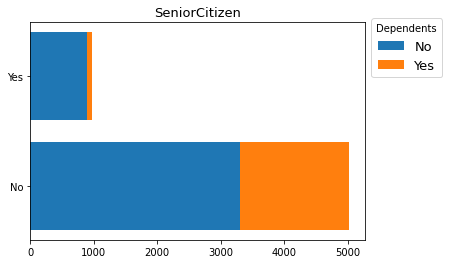

In [ ]:
# агрегация данных
dependents_grouped_df = df_telecom_users_for_analysis.groupby(['SeniorCitizen', 'Dependents'])['Dependents']\
    .count()\
    .unstack('Dependents')
start = 0
# цикл перебирающих столбцы и рисующий бары
for yes_no_column in dependents_grouped_df.columns:
    plt.barh(y=dependents_grouped_df.index, 
                width=dependents_grouped_df[yes_no_column], 
                left=start, 
                label=yes_no_column)
    start = dependents_grouped_df[yes_no_column]
    plt.title('SeniorCitizen', fontsize=13)
    plt.legend(title='Dependents', loc=1, bbox_to_anchor=(1.25, 1.05), fontsize=13)

Вывод: пенсионеры почти не имеют иждивенцев.

3 Посмотрим распределение признака Dependents (Имеются иждевенцы) внутри признака Partner (Имеют партнера). <br>
Данный график может сказать сколько одиноких горожан или горожан, состоящих в отношениях, имеют нетрудоспособных граждан на своем попечении.

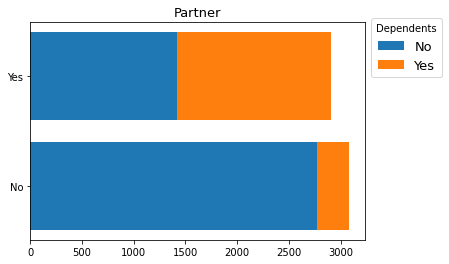

In [ ]:
# агрегация данных
partner_grouped_df = df_telecom_users_for_analysis.groupby(['Partner', 'Dependents'])['Dependents']\
    .count()\
    .unstack('Dependents')
start = 0
# цикл перебирающих столбцы и рисующий бары
for yes_no_column in partner_grouped_df.columns:
    plt.barh(y=partner_grouped_df.index, 
                width=partner_grouped_df[yes_no_column], 
                left=start, 
                label=yes_no_column)
    start = partner_grouped_df[yes_no_column]
    plt.title('Partner', fontsize=13)
    plt.legend(title='Dependents', loc=1, bbox_to_anchor=(1.25, 1.05), fontsize=13)

Вывод: большинство семейных пар имеют иждивенцев, вероятно, детей.

4 Посмотрим какая категория граждан заключает долгосрочные контракты.

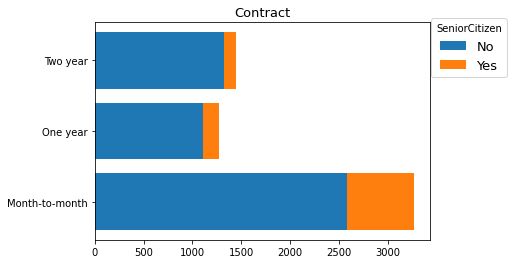

In [ ]:
# агрегация данных
contract_grouped_df = df_telecom_users_for_analysis.groupby(['Contract', 'SeniorCitizen'])['SeniorCitizen']\
    .count()\
    .unstack('SeniorCitizen')
start = 0
# цикл перебирающих столбцы и рисующий бары
for yes_no_column in contract_grouped_df.columns:
    plt.barh(y=contract_grouped_df.index,
             width=contract_grouped_df[yes_no_column], 
             left=start, 
             label=yes_no_column)
    start = contract_grouped_df[yes_no_column]
    plt.title('Contract', fontsize=13)
    plt.legend(title='SeniorCitizen', loc=1, bbox_to_anchor=(1.25, 1.05), fontsize=13)

Выводы: пенсионеры предпочитают краткосрочные контракты.

Подготовим датафрейм для дальнейшей работы. Нормализуем количественные данные, качественные данные приведем к бинарному формату.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

# кодирование бинарных категориальных признаков
binary_data = df_telecom_users[[column for column in quality_columns if quality_data_describe[column]['unique'] == 2]]
binary_data_encoded = pd.DataFrame()
for column in binary_data.columns:
    label_e = LabelEncoder()
    label_e = label_e.fit(binary_data[column])
    binary_data_encoded[column] = label_e.transform(binary_data[column])

# кодирование небинарных категориальных признаков 
nonbinary_data = df_telecom_users[[column for column in quality_columns if quality_data_describe[column]['unique'] != 2]]
nonbinary_data_encoded = pd.DataFrame()
for column in nonbinary_data.columns:
    one_h_e = OneHotEncoder(sparse=False)
    one_h_e = one_h_e.fit_transform(nonbinary_data[column].values.reshape(-1, 1))
    for i in range(one_h_e.shape[1]):
        nonbinary_data_encoded[f'{column}_{i}'] = [j[i] for j in one_h_e]

# нормирование количественных признаков 
quantitive_data = df_telecom_users[quantity_columns]
quantitive_data_norm = pd.DataFrame(StandardScaler().fit_transform(quantitive_data), columns=quantity_columns)

# склейка трех таблиц
df_telecom_users_encoded = pd.concat((binary_data_encoded, 
                                      nonbinary_data_encoded, 
                                      quantitive_data_norm), axis=1)
df_telecom_users_encoded

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure,MonthlyCharges,TotalCharges
0,1,0,1,1,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.612576,-1.351686,-0.246076
1,0,0,0,0,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.470387,0.775360,0.738345
2,0,1,1,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.225633,0.336999,0.253138
3,1,0,0,0,1,1,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.161310,-0.295635,-0.904022
4,1,0,0,0,1,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.242895,-0.376997,-0.956353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,1,0,1,0,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.283688,1.002843,-0.967127
5982,0,0,1,1,1,1,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.386254,0.873327,-0.042182
5983,1,0,1,1,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.834971,-1.449653,-0.874316
5984,1,1,0,0,1,1,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.834971,1.150623,-0.481128


In [ ]:
# посмотрим корреляцию признаков
corr_df = df_telecom_users_encoded.corr()
# выберем фичи с корреляцией с столбцом Churn больше 0.05 
churn_corr_df = corr_df.loc[:, 'Churn']
churn_corr_list = churn_corr_df[abs(churn_corr_df) > 0.05].index.tolist()
df_telecom_users_encoded_clear = df_telecom_users_encoded[churn_corr_list]

In [ ]:
corr_df

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.007447,-0.007791,0.009083,-0.004913,-0.013990,-0.009548,-0.002087,0.004913,-0.000853,0.007244,-0.011121,0.005043,0.015776,0.005043,-0.022042,0.013949,0.005043,-0.018858,0.000580,0.005043,-0.004975,0.005223,0.005043,-0.010327,0.005289,0.005043,-0.009585,0.004491,0.005043,-0.008748,-0.005120,0.016197,-0.009553,-0.017350,0.001695,0.007008,0.007530,0.003207,-0.014286,-0.003664
SeniorCitizen,-0.007447,1.000000,0.014867,-0.214233,0.009464,0.155691,0.150097,-0.126027,-0.009464,0.132999,-0.107650,0.256282,-0.184760,0.185981,-0.184760,-0.037615,0.092157,-0.184760,0.063561,0.094173,-0.184760,0.061565,0.207382,-0.184760,-0.061045,0.053293,-0.184760,0.102519,0.038851,-0.184760,0.116841,0.141796,-0.040934,-0.125914,-0.013275,-0.028912,0.170548,-0.150208,0.005468,0.219387,0.093807
Partner,-0.007791,0.014867,1.000000,0.449029,0.024926,-0.018037,-0.146840,-0.132962,-0.024926,0.149325,-0.007910,0.005765,0.002190,-0.140166,0.002190,0.153067,-0.145474,0.002190,0.149407,-0.147939,0.002190,0.152803,-0.115655,0.002190,0.125468,-0.131039,0.002190,0.130013,-0.122451,0.002190,0.120763,-0.285939,0.084043,0.252479,0.099046,0.097098,-0.087224,-0.094824,0.381976,0.104006,0.321349
Dependents,0.009083,-0.214233,0.449029,1.000000,-0.000579,-0.112405,-0.160204,0.021830,0.000579,-0.022399,0.051601,-0.168349,0.143465,-0.194971,0.143465,0.085138,-0.140116,0.143465,0.021946,-0.127766,0.143465,0.009334,-0.179233,0.143465,0.067460,-0.101902,0.143465,-0.018705,-0.082077,0.143465,-0.038750,-0.231615,0.062556,0.209799,0.041184,0.077927,-0.157817,0.060282,0.163710,-0.115803,0.062691
PhoneService,-0.004913,0.009464,0.024926,-0.000579,1.000000,0.021340,0.009421,0.315017,-1.000000,0.284667,-0.455142,0.292425,0.173395,-0.061744,0.173395,-0.089481,-0.096362,0.173395,-0.049382,-0.074266,0.173395,-0.072536,-0.060816,0.173395,-0.090169,-0.123065,0.173395,-0.022703,-0.115619,0.173395,-0.030394,-0.002022,-0.005793,0.007904,0.010743,-0.014358,0.005602,-0.002758,0.010392,0.251029,0.117165
PaperlessBilling,-0.013990,0.155691,-0.018037,-0.112405,0.021340,1.000000,0.188996,-0.154719,-0.021340,0.169139,-0.065577,0.330319,-0.322736,0.261808,-0.322736,0.004057,0.148412,-0.322736,0.124097,0.166915,-0.322736,0.105015,0.231914,-0.322736,0.037001,0.047141,-0.322736,0.225319,0.061468,-0.322736,0.210501,0.174837,-0.052273,-0.153529,-0.017177,-0.019713,0.210580,-0.200400,0.006569,0.355816,0.162804
Churn,-0.009548,0.150097,-0.146840,-0.160204,0.009421,0.188996,1.000000,-0.030357,-0.009421,0.036342,-0.120394,0.300898,-0.223860,0.341700,-0.223860,-0.174301,0.265175,-0.223860,-0.082648,0.252376,-0.223860,-0.070000,0.330994,-0.223860,-0.161821,0.128008,-0.223860,0.060379,0.129669,-0.223860,0.058865,0.403907,-0.175855,-0.301906,-0.112447,-0.135232,0.296803,-0.090066,-0.348469,0.186753,-0.196390
MultipleLines_0,-0.002087,-0.126027,-0.132962,0.021830,0.315017,-0.154719,-0.030357,1.000000,-0.315017,-0.820144,-0.068872,-0.192020,0.311315,-0.114914,0.311315,-0.156167,-0.030631,0.311315,-0.236738,-0.023614,0.311315,-0.244971,-0.112601,0.311315,-0.158131,0.000935,0.311315,-0.264045,0.015111,0.311315,-0.277551,0.087804,0.003193,-0.105310,-0.069062,-0.066418,-0.078241,0.221144,-0.329603,-0.339776,-0.400553
MultipleLines_1,0.004913,-0.009464,-0.024926,0.000579,-1.000000,-0.021340,-0.009421,-0.315017,1.000000,-0.284667,0.455142,-0.292425,-0.173395,0.061744,-0.173395,0.089481,0.096362,-0.173395,0.04938

# 3. Построение моделей для прогнозирования оттока

### 3.1 Обучение моделей с default параметрами

Проведем следующий анализ:
1. Обучим ряд моделей с базовыми праметрами. Выберем разного рода алгоритмы. 
2. Посмотрим насколько эффективны алгоритмы, посчитаем auc_roc_score (будем считать, что время обучения модели значение не имеет).
3. Выберем топ 5-7 алгоритмов.
4. На топ-3 алгоритмах проведем выбор признаков и генерацию новых. <br>
Создадим 2 и 3 полином признаков MonthlyCharges, TotalCharges; на основе признака InternetService создадим признак InternetUser, отражающий факт наличия интернет соединения у пользователя. Выведем и сохраним топ фичей, позже проведем по ним анализ.
5. На топ 5-7 алгоритмах построим модели на выбранных признаках.

In [ ]:
# Разобьем данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

y = df_telecom_users_encoded['Churn']
X = df_telecom_users_encoded.drop('Churn', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
# объявим датафрейм для хранения результатов моделирования
best_modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

In [ ]:
# Метод ближайших соседей неэффективен при большом количестве фичей
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import (SVC, 
                         LinearSVC)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import (LogisticRegression, 
                                  SGDClassifier)
from sklearn.ensemble import (GradientBoostingClassifier,
                              AdaBoostClassifier,
                              RandomForestClassifier)
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# объявим все объекты
knc = KNeighborsClassifier()
bnb = BernoulliNB()
lin_svc = LinearSVC(random_state=17)
dtc = DecisionTreeClassifier(random_state=17)
lgr = LogisticRegression(random_state=17)
sgd = SGDClassifier(random_state=17)
rfc = RandomForestClassifier(random_state=17)
gboost = GradientBoostingClassifier(random_state=17)
adaboost = AdaBoostClassifier(random_state=17)
xgb_classif = xgb.XGBClassifier(max_depth=2, random_state=17)


# разобьем модели на два списка: в 1 у объектов есть функция "predict_proba", в другом нет
with_predict_proba_models = [knc, bnb, dtc, lgr, rfc, gboost, adaboost, xgb_classif]
without_predict_proba_models = [lin_svc, sgd]
all_models = with_predict_proba_models + without_predict_proba_models

In [ ]:
# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение алгоритмов с default параметрами
for n, model in enumerate(with_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [current_model.__class__.__name__, auc]
    
# обучение алгоритмов с параметрами подобранными с помощью кросс-валидации
for n, model in enumerate(without_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(with_predict_proba_models) + n] = [current_model.__class__.__name__, auc]
modeling_results.sort_values('AUC', ascending=False)

,model_type,AUC
6,AdaBoostClassifier,0.838523
7,XGBClassifier,0.837827
5,GradientBoostingClassifier,0.836893
3,LogisticRegression,0.833862
8,LinearSVC,0.833046
9,SGDClassifier,0.827212
4,RandomForestClassifier,0.814344
1,BernoulliNB,0.804900
0,KNeighborsClassifier,0.764417
2,DecisionTreeClassifier,0.657986


Качество большинства моделей одинаковое. Для дальнейшей работы выберем топ-7 алгоритмов: <br>
AdaBoostClassifier, XGBClassifier, GradientBoostingClassifier, LogisticRegression, LinearSVC, SGDClassifier, RandomForestClassifier

In [ ]:
# разобьем модели на два списка: в 1 у объектов есть функция "predict_proba", в другом нет
with_predict_proba_models = [lgr, rfc, gboost, adaboost, xgb_classif]
without_predict_proba_models = [lin_svc, sgd]
all_models = with_predict_proba_models + without_predict_proba_models

In [ ]:
# объявим датафрейм для хранения наиболее важных признаков
top_feature = pd.DataFrame(index=X.columns)

Настроим **AdaBoostClassifier**

In [ ]:
# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])
# обучаем
adaboost_model = adaboost.fit(x_train, y_train)
# считаем скор
probas = adaboost_model.predict_proba(x_test)
auc = roc_auc_score(y_test, probas[:, 1])
modeling_results.loc[0] = [adaboost_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,AdaBoostClassifier,0.838523


In [ ]:
X = df_telecom_users_encoded.drop('Churn', axis=1)
# пачка изменений в датасете
# X['MonthlyCharges^2'] = X['MonthlyCharges']**2 # неудача
# X['TotalCharges^2'] = X['TotalCharges']**2 # неудача
# X['TotalCharges^3'] = X['TotalCharges']**3 # неудача
# X = X.drop(['gender'], axis=1) # неудача
# X = X.drop(['PhoneService'], axis=1) # неудача

# def internet_user(x):
#     if x['InternetService_2'] == 1:
#         return 0
#     else:
#         return 1

# X['InternetUser'] = X.apply(internet_user, axis=1) # неудача
# X = X.drop(['InternetService_0', 'InternetService_1', 'InternetService_2'], axis=1) # неудача

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])
# обучаем
adaboost_model = adaboost.fit(x_train, y_train)
# считаем скор
probas = adaboost_model.predict_proba(x_test)
auc = roc_auc_score(y_test, probas[:, 1])
modeling_results.loc[0] = [adaboost_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,AdaBoostClassifier,0.838523


Улучшить модель не удалось.

In [ ]:
# сохраним наиболее весомые признаки в отдельный датасет
feature_importances_list = []
for i in range(len(adaboost_model.feature_importances_)):
    if adaboost_model.feature_importances_[i] != 0:
        feature_importances_list.append(X.columns[i])

for column in feature_importances_list:
    top_feature.loc[column, 'AdaBoost'] = 1

In [ ]:
X = X[top_feature[top_feature.loc[:, 'AdaBoost'] == 1].index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение алгоритмов с default параметрами
for n, model in enumerate(with_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [current_model.__class__.__name__, auc]
    
# обучение алгоритмов с параметрами подобранными с помощью кросс-валидации
for n, model in enumerate(without_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(with_predict_proba_models) + n] = [current_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,LogisticRegression,0.833701
1,RandomForestClassifier,0.816648
2,GradientBoostingClassifier,0.834556
3,AdaBoostClassifier,0.838523
4,XGBClassifier,0.837141
5,LinearSVC,0.833125
6,SGDClassifier,0.825198


In [ ]:
# сохраним результат в датафрейм с лучшими моделями
best_modeling_results.loc[0] = [(modeling_results.loc[modeling_results['AUC'].idxmax(), 'model_type'] + ' (AdaBoost best features)'),
                                modeling_results.AUC.max()]

Настроим **XGBoost Classifier**.

In [ ]:
X = df_telecom_users_encoded.drop('Churn', axis=1)
# пачка изменений в датасете
X['MonthlyCharges^2'] = X['MonthlyCharges']**2 # успех
X['TotalCharges^2'] = X['TotalCharges']**2 # успех
# X['TotalCharges^3'] = X['TotalCharges']**3 # неудача
# X = X.drop(['gender'], axis=1) # неудача
# X = X.drop(['PhoneService'], axis=1) # неудача

# def internet_user(x):
#     if x['InternetService_2'] == 1:
#         return 0
#     else:
#         return 1

# X['InternetUser'] = X.apply(internet_user, axis=1) # неудача
# X = X.drop(['InternetService_0', 'InternetService_1', 'InternetService_2'], axis=1) # неудача

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

xgb_model = xgb_classif.fit(x_train, y_train)
probas = xgb_model.predict_proba(x_test)
auc = roc_auc_score(y_test, probas[:, 1])
modeling_results.loc[0] = [xgb_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,XGBClassifier,0.838222


In [ ]:
# сохраним наиболее весомые признаки в отдельный датасет
feature_importances_list = xgb_model.get_booster().get_score(importance_type="gain").keys()

for column in feature_importances_list:
    top_feature.loc[column, 'XGBoost'] = 1

In [ ]:
feature_importances_list


dict_keys(['Contract_0', 'MonthlyCharges', 'OnlineSecurity_0', 'InternetService_1', 'Contract_1', 'tenure', 'TechSupport_0', 'Contract_2', 'PaymentMethod_2', 'PaperlessBilling', 'TotalCharges', 'OnlineBackup_0', 'MultipleLines_0', 'StreamingMovies_2', 'Partner', 'SeniorCitizen', 'StreamingTV_2', 'PhoneService', 'TotalCharges^2', 'Dependents', 'MonthlyCharges^2', 'PaymentMethod_1', 'PaymentMethod_3'])

In [ ]:
X = X[feature_importances_list]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение алгоритмов с default параметрами
for n, model in enumerate(with_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [current_model.__class__.__name__, auc]
    
# обучение алгоритмов с параметрами подобранными с помощью кросс-валидации
for n, model in enumerate(without_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(with_predict_proba_models) + n] = [current_model.__class__.__name__, auc]
modeling_results

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_type,AUC
0,LogisticRegression,0.833655
1,RandomForestClassifier,0.825163
2,GradientBoostingClassifier,0.837469
3,AdaBoostClassifier,0.839901
4,XGBClassifier,0.838222
5,LinearSVC,0.832895
6,SGDClassifier,0.831584


In [ ]:
# сохраним результат в датафрейм с лучшими моделями
best_modeling_results.loc[1] = [(modeling_results.loc[modeling_results['AUC'].idxmax(), 'model_type'] + ' (XGBoost best features)'),
                                modeling_results.AUC.max()]

Настроим **GradientBoostingClassifier**.

In [ ]:
X = df_telecom_users_encoded.drop('Churn', axis=1)
# пачка изменений в датасете
# X['MonthlyCharges^2'] = X['MonthlyCharges']**2 # неудача
# X['TotalCharges^2'] = X['TotalCharges']**2 # неудача
X['TotalCharges^3'] = X['TotalCharges']**3 # успех
# X = X.drop(['gender'], axis=1) # неудача
X = X.drop(['PhoneService'], axis=1) # успех

# def internet_user(x):
#     if x['InternetService_2'] == 1:
#         return 0
#     else:
#         return 1

# X['InternetUser'] = X.apply(internet_user, axis=1) # неудача
# X = X.drop(['InternetService_0', 'InternetService_1', 'InternetService_2'], axis=1) # неудача

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

gboost_model = gboost.fit(x_train, y_train)
probas = gboost_model.predict_proba(x_test)
auc = roc_auc_score(y_test, probas[:, 1])
modeling_results.loc[0] = [gboost_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,GradientBoostingClassifier,0.837088


In [ ]:
# сохраним наиболее весомые признаки в отдельный датасет
feature_importances_list = []
for i in range(len(gboost_model.feature_importances_)):
    if gboost_model.feature_importances_[i] != 0:
        feature_importances_list.append(X.columns[i])

for column in feature_importances_list:
    top_feature.loc[column, 'GradientBoostingClassifier'] = 1

In [ ]:
X = X[top_feature[top_feature.loc[:, 'GradientBoostingClassifier'] == 1].index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение алгоритмов с default параметрами
for n, model in enumerate(with_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [current_model.__class__.__name__, auc]
    
# обучение алгоритмов с параметрами подобранными с помощью кросс-валидации
for n, model in enumerate(without_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(with_predict_proba_models) + n] = [current_model.__class__.__name__, auc]
modeling_results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,model_type,AUC
0,LogisticRegression,0.833371
1,RandomForestClassifier,0.814799
2,GradientBoostingClassifier,0.837053
3,AdaBoostClassifier,0.837834
4,XGBClassifier,0.837827
5,LinearSVC,0.832174
6,SGDClassifier,0.805576


In [ ]:
# сохраним результат в датафрейм с лучшими моделями
best_modeling_results.loc[2] = [(modeling_results.loc[modeling_results['AUC'].idxmax(), 'model_type'] + ' (GB Classifier best features)'),
                                modeling_results.AUC.max()]
best_modeling_results

,model_type,AUC
0,AdaBoostClassifier (AdaBoost best features),0.838523
1,AdaBoostClassifier (XGBoost best features),0.839901
2,AdaBoostClassifier (GB Classifier best features),0.837834


### 3.2 Обучение моделей с гиперпараметрами, подобранными с помощью кросс-валидации.
Выберем признаки, при которых auc_roc_score в ранее обученных моделей максимальный, возьмем топ-7 моделей и подберем им гиперпараметры с помощью кросс-валидации.

In [ ]:
# объявим Х и отберем фичи
X = df_telecom_users_encoded.drop('Churn', axis=1)
X['MonthlyCharges^2'] = X['MonthlyCharges']**2 # успех
X['TotalCharges^2'] = X['TotalCharges']**2 # успех
X = X[top_feature[top_feature.loc[:, 'XGBoost'] == 1].index]

# разобьем на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# сохраним модели в два списка: в 1 у объектов есть функция "predict_proba", в другом нет
cv_with_predict_proba_models = [lgr, rfc, gboost, adaboost, xgb_classif]
cv_without_predict_proba_models = [lin_svc, sgd]
all_cv_models = cv_with_predict_proba_models + cv_without_predict_proba_models

# напишем цикл, который обучит все ранее использованные модели, подбирая гиперпараметры с помощью кросс-валидации
skf = StratifiedKFold(n_splits=10)

# пропишем параметры моделей
lin_svc_params = {'C': np.arange(0.1, 1, 0.2),
                  'tol': [0.0001, 0.0005, 0.001, 0.005],
                  'fit_intercept': [False, True]} # LinearSVC

lgr_params = {'solver': ['lbfgs', 'liblinear'],
              'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              'max_iter': [200]} # LogisticRegression

sgd_params = {'eta0': np.linspace(0, 0.05, 26),
              'alpha': np.linspace(0.0001, 0.0051, 26)} # SGDClassifier

rfc_params = {'n_estimators': range(10, 100, 10), 
              'max_depth': range(3, 30, 2),
              'min_samples_leaf': range(1, 5)} # RandomForestClassifier

gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

adaboost_params = {'n_estimators': range(10, 51, 5),
                   'learning_rate': np.arange(0.1, 2, 0.2)} # AdaBoostClassifier

xgb_params = {'n_estimators': range(50, 90, 5),
              'eta': np.arange(0.1, 0.5, .1),
              'subsample': np.arange(0.1, 1., 0.2)} # XGBoostClassifier

# разобьем параметры на два списка: 
# в 1 списке будут параметры, относящиеся к объектам, у которых есть функция "predict_proba", 
# в 2 списке будут параметры, относящиеся к объектам, у которых такой функции нет
params_list_for_with_pp_models = [lgr_params, rfc_params, gbc_params, adaboost_params, xgb_params]
params_list_for_without_pp_models = [lin_svc_params, sgd_params]                                 

In [ ]:
# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение моделей, у объектов которых есть функция "predict_proba"
for n, model in enumerate(cv_with_predict_proba_models):
    current_model = GridSearchCV(estimator=model, 
                                 param_grid=params_list_for_with_pp_models[n], 
                                 scoring='roc_auc', 
                                 cv=skf).fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [model.__class__.__name__ + ' (XGBoost best features) + GSCV', auc]

# обучение моделей, у объектов которых нет функции "predict_proba"
for n, model in enumerate(cv_without_predict_proba_models):
    current_model = GridSearchCV(estimator=model, 
                                 param_grid=params_list_for_without_pp_models[n], 
                                 scoring='roc_auc', 
                                 cv=skf).fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(cv_with_predict_proba_models) + n] = [model.__class__.__name__ + ' (XGBoost best features) + GSCV', auc]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
# Сконкатенируем датафреймы
best_modeling_results = pd.concat([best_modeling_results, modeling_results])
best_modeling_results.reset_index(inplace=True, drop=True)
best_modeling_results

Некоторые модели переобучены.

### 3.3 Обучение моделей с уменьшенным с помощью PCA количеством фич

In [ ]:
from sklearn.decomposition import PCA

with_predict_proba_models = [lgr, rfc, gboost, adaboost, xgb_classif]
without_predict_proba_models = [lin_svc, sgd]

pca_models = pd.DataFrame()
# в цикле переберем все варианты количества фич
for num_components in range(2, X.shape[1] + 1):
    # уменьшим количество фич
    pca = PCA(n_components=num_components).fit(X)
    X_transformed = pca.transform(X)

    # разделим датасет на обучающую и тестовую выборки
    x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_transformed, y, test_size=0.3, random_state=17)

    # обучение моделей, у объектов которых есть функция "predict_proba"
    for n, model in enumerate(with_predict_proba_models):
        current_model = model.fit(x_train_pca, y_train_pca)
        probas = current_model.predict_proba(x_test_pca)
        auc = roc_auc_score(y_test_pca, probas[:, 1])        
        pca_models.loc[current_model.__class__.__name__, num_components] = auc

    # обучение моделей, у объектов которых нет функции "predict_proba"
    for n, model in enumerate(without_predict_proba_models):
        current_model = model.fit(x_train_pca, y_train_pca)
        decision_func_results = current_model.decision_function(x_test_pca)
        auc = roc_auc_score(y_test_pca, decision_func_results)
        pca_models.loc[current_model.__class__.__name__, num_components] = auc
pca_models

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
LogisticRegression,0.791458,0.823240,0.827957,0.828562,0.832848,0.834697,0.834822,0.835178,0.835765,0.835319,0.835158,0.834966,0.835234,0.835332,0.834699,0.834647,0.834668,0.834692,0.834961,0.834442,0.833655,0.833655
RandomForestClassifier,0.773131,0.798101,0.812258,0.814089,0.818146,0.820712,0.820554,0.819694,0.817911,0.816815,0.816645,0.817718,0.816983,0.821498,0.815929,0.817767,0.815894,0.813377,0.814525,0.813103,0.815738,0.815549
GradientBoostingClassifier,0.810388,0.818186,0.824531,0.821625,0.829140,0.831647,0.832257,0.832841,0.833063,0.831928,0.832196,0.832519,0.831285,0.833114,0.830997,0.830670,0.830204,0.831880,0.832571,0.835086,0.834265,0.834010
AdaBoostClassifier,0.801269,0.812744,0.813983,0.815276,0.818753,0.822053,0.817187,0.820842,0.817885,0.821894,0.821894,0.818397,0.818124,0.817531,0.821602,0.821602,0.817157,0.814103,0.811325,0.814067,0.814067,0.814067
XGBClassifier,0.810714,0.821070,0.825510,0.827197,0.833129,0.833459,0.834492,0.836135,0.834489,0.835978,0.835501,0.835263,0.835096,0.835569,0.834459,0.834459,0.834461,0.833705,0.835246,0.834191,0.834192,0.834236
LinearSVC,0.790976,0.822854,0.827898,0.828614,0.832880,0.834718,0.834846,0.835179,0.835634,0.835574,0.835535,0.835485,0.835579,0.834822,0.834791,0.834822,0.834838,0.834875,0.835112,0.832859,0.832887,0.832887
SGDClassifier,0.790144,0.817386,0.822150,0.822745,0.818580,0.820587,0.821300,0.829209,0.824164,0.827793,0.825615,0.823708,0.825662,0.832740,0.822083,0.829356,0.776307,0.752097,0.769639,0.751980,0.822934,0.822934


In [ ]:
# объявим датафрейм с локальными результатами
n_comp_with_the_best_pca = pd.DataFrame(columns=['model_type', 'AUC'])
# выделим лучшие модели
i = 0
for index, row in pca_models.iterrows():
    n_comp_with_the_best_pca.loc[i] = [index + f' (XGBoost best features) + PCA_ncomp = {row.idxmax(axis=0)}', row.max()]
    i += 1
n_comp_with_the_best_pca

,model_type,AUC
0,LogisticRegression (XGBoost best features) + P...,0.835765
1,RandomForestClassifier (XGBoost best features)...,0.821498
2,GradientBoostingClassifier (XGBoost best featu...,0.835086
3,AdaBoostClassifier (XGBoost best features) + P...,0.822053
4,XGBClassifier (XGBoost best features) + PCA_nc...,0.836135
5,LinearSVC (XGBoost best features) + PCA_ncomp ...,0.835634
6,SGDClassifier (XGBoost best features) + PCA_nc...,0.832740


In [ ]:
# Сконкатенируем датафреймы
best_modeling_results = pd.concat([best_modeling_results, n_comp_with_the_best_pca])
best_modeling_results.reset_index(inplace=True, drop=True)
best_modeling_results

### 3.4 Обучение стекинг модели <br>
Строить будем по следующему принципу: в качестве базовых алгоритмов будем использовать 7 алгоритмов с default гиперпарамметрами, в качестве мета-алгоритма - XGBClassifier с default гиперпарамметрами. Будем использовать весь набор данных.

In [ ]:
# объявим все объекты
lgr = LogisticRegression(random_state=17) # default
sgd = SGDClassifier(random_state=17) # default
rfc = RandomForestClassifier(random_state=17) # GSCV
lin_svc = LinearSVC(random_state=17)
gboost = GradientBoostingClassifier(random_state=17) # default
adaboost = AdaBoostClassifier(random_state=17) # default
xgb_classif = xgb.XGBClassifier(max_depth=2, random_state=17)

# Соберем в списки объекты в соответствующие списки (кроме XGBoost)
top_default_models = [lgr, sgd, rfc, lin_svc, gboost, adaboost]

# обновим данные
y = df_telecom_users_encoded['Churn']
X = df_telecom_users_encoded.drop('Churn', axis=1)
# разобьем данные
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [ ]:
# Обучение базовых алгоритмов
top_models_list = []

# обучение алгоритмов с default параметрами
for n, model in enumerate(top_default_models):
    current_model = model.fit(x_train, y_train)
    top_models_list.append(current_model)

In [ ]:
# напишем функцию, которая создаст список со всеми возможными сочетаниями элеметнов списка
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)  # создадим дубликат списка
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

In [ ]:
# напишем функцию, которая обучит стекинг модель, 
# переберав все возможные сочетания базовых алгоритмов (511 сочетаний)
from sklearn.model_selection import cross_val_predict

def special_stacking_loop(models, meta_alg, 
                          data_train, targets_train, 
                          data_test, targets_test, 
                          random_state=None, cv=5):
    '''Данная функция является классическим стекингом, 
    но с добавлением перебора различных комбинаций базовых моделей. 
    На вход подается список объектов базовых алгоритмов, объект мета-алгоритма, 
    данные разбитые на тренировочную и тестовую выборки и др'''
    predict_df = pd.DataFrame(columns=['models_combo', 'AUC'])
    for i, models_combo in enumerate(powerset(models)):        
        # объявим матрицу мета-признаков (кол-во объектов, кол-во моделей)
        meta_mtrx = np.empty([data_train.shape[0], len(models_combo)])
            
        # в цикле делаем обучуние и предикт с помощью кросс-валидации и заполняем матрицу мета-признаков
        for n, model in enumerate(models_combo):
            meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train,
                                                cv=cv, method='predict')
        
        # обучим мета-алгоритм
        meta_model = meta_alg.fit(meta_mtrx, targets_train)

        # далее идет код предикта на тестовых данных
        meta_mtrx_test = np.empty([data_test.shape[0], len(models_combo)])
        for n, model in enumerate(models_combo):
            meta_mtrx_test[:, n] = model.predict(data_test)
        
        # итоговый предикт        
        # meta_model_prediction = meta_alg.predict(meta_mtrx_test)       
        
        # посчитаем auc_roc_score
        probas = meta_alg.predict_proba(meta_mtrx_test)
        auc = roc_auc_score(targets_test, probas[:, 1])
        
        # добавим модель и скор в датафрейм
        predict_df.loc[i] = [models_combo, auc]
       
    return predict_df[predict_df.AUC == predict_df.AUC.max()]

In [ ]:
# обучим стекинг модели и выведем лучшую
stacking_result = special_stacking_loop(top_models_list, xgb_classif, 
                          x_train, y_train, 
                          x_test, y_test, cv=5)

In [ ]:
# выведем лучшее сочетание базовых алгоритмов и скор
print(f'''Сочетание базовых алгоритмов с наилучшим значением auc_roc_score:
{[model.__class__.__name__ for model in stacking_result.models_combo.values[0]]}
AUC={np.round(stacking_result.AUC.values[0], 3)}''')

Сочетание базовых алгоритмов с наилучшим значением auc_roc_score:
['LogisticRegression', 'SGDClassifier', 'RandomForestClassifier', 'LinearSVC', 'GradientBoostingClassifier', 'AdaBoostClassifier']
AUC=0.753


In [ ]:
# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])
modeling_results.loc[0] = ['Stacking', stacking_result.AUC.values[0]]

# Сконкатенируем датафреймы
best_modeling_results = pd.concat([best_modeling_results, modeling_results])
best_modeling_results.reset_index(inplace=True, drop=True)
best_modeling_results

,model_type,AUC
0,AdaBoostClassifier (AdaBoost best features),0.838523
1,AdaBoostClassifier (XGBoost best features),0.839901
2,AdaBoostClassifier (GB Classifier best features),0.837834
3,LogisticRegression (XGBoost best features) + GSCV,0.834468
4,RandomForestClassifier (XGBoost best features)...,0.832482
5,GradientBoostingClassifier (XGBoost best featu...,0.837370
6,AdaBoostClassifier (XGBoost best features) + GSCV,0.835759
7,XGBClassifier (XGBoost best features) + GSCV,0.837238
8,LinearSVC (XGBoost best features) + GSCV,0.833102
9,SGDClassifier (XGBoost best features) + GSCV,0.826750


### 3.5 Обучение моделей с уменьшенным с помощью корреляции количеством признаков (см п.2) с default гиперпараметрами.

In [ ]:
# объявим данные и поделим их на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

y_1 = df_telecom_users_encoded_clear['Churn']
X_1 = df_telecom_users_encoded_clear.drop('Churn', axis=1)
x_train, x_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.3, random_state=17)

In [ ]:
# объявим датафрейм с локальными результатами
modeling_results_36_features = pd.DataFrame(columns=['model_type', 'AUC'])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import (GradientBoostingClassifier,
                              AdaBoostClassifier,
                              RandomForestClassifier)
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# объявим все объекты
lgr = LogisticRegression(random_state=17) # default
sgd = SGDClassifier(random_state=17) # default
rfc = RandomForestClassifier(random_state=17) # GSCV
lin_svc = LinearSVC(random_state=17)
gboost = GradientBoostingClassifier(random_state=17) # default
adaboost = AdaBoostClassifier(random_state=17) # default
xgb_classif = xgb.XGBClassifier(max_depth=2, random_state=17)

# разобьем модели на два списка: в 1 у объектов есть функция "predict_proba", в другом нет
with_predict_proba_models = [lgr, rfc, gboost, adaboost, xgb_classif]
without_predict_proba_models = [lin_svc, sgd]

In [ ]:
# напишем циклы, которые обучат все модели с default параметрами

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])

# обучение моделей, у объектов которых есть функция "predict_proba"
for n, model in enumerate(with_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    probas = current_model.predict_proba(x_test)
    auc = roc_auc_score(y_test, probas[:, 1])
    modeling_results.loc[n] = [current_model.__class__.__name__+ '+ 35 features', auc]

# обучение моделей, у объектов которых нет функции "predict_proba"
for n, model in enumerate(without_predict_proba_models):
    current_model = model.fit(x_train, y_train)
    decision_func_results = current_model.decision_function(x_test)
    auc = roc_auc_score(y_test, decision_func_results)
    modeling_results.loc[len(with_predict_proba_models) + n] = [current_model.__class__.__name__+ '+36features', auc]
modeling_results

,model_type,AUC
0,LogisticRegression+ 35 features,0.833862
1,RandomForestClassifier+ 35 features,0.814344
2,GradientBoostingClassifier+ 35 features,0.836893
3,AdaBoostClassifier+ 35 features,0.838523
4,XGBClassifier+ 35 features,0.837827
5,LinearSVC+36features,0.833046
6,SGDClassifier+36features,0.827212


In [ ]:
# Сконкатенируем датафреймы
best_modeling_results = pd.concat([best_modeling_results, modeling_results])
best_modeling_results.reset_index(inplace=True, drop=True)
best_modeling_results

,model_type,AUC
0,AdaBoostClassifier (AdaBoost best features),0.838523
1,AdaBoostClassifier (XGBoost best features),0.839901
2,AdaBoostClassifier (GB Classifier best features),0.837834
3,LogisticRegression (XGBoost best features) + GSCV,0.834468
4,RandomForestClassifier (XGBoost best features)...,0.832482
5,GradientBoostingClassifier (XGBoost best featu...,0.837370
6,AdaBoostClassifier (XGBoost best features) + GSCV,0.835759
7,XGBClassifier (XGBoost best features) + GSCV,0.837238
8,LinearSVC (XGBoost best features) + GSCV,0.833102
9,SGDClassifier (XGBoost best features) + GSCV,0.826750


# 4. Сравнение качества моделей 

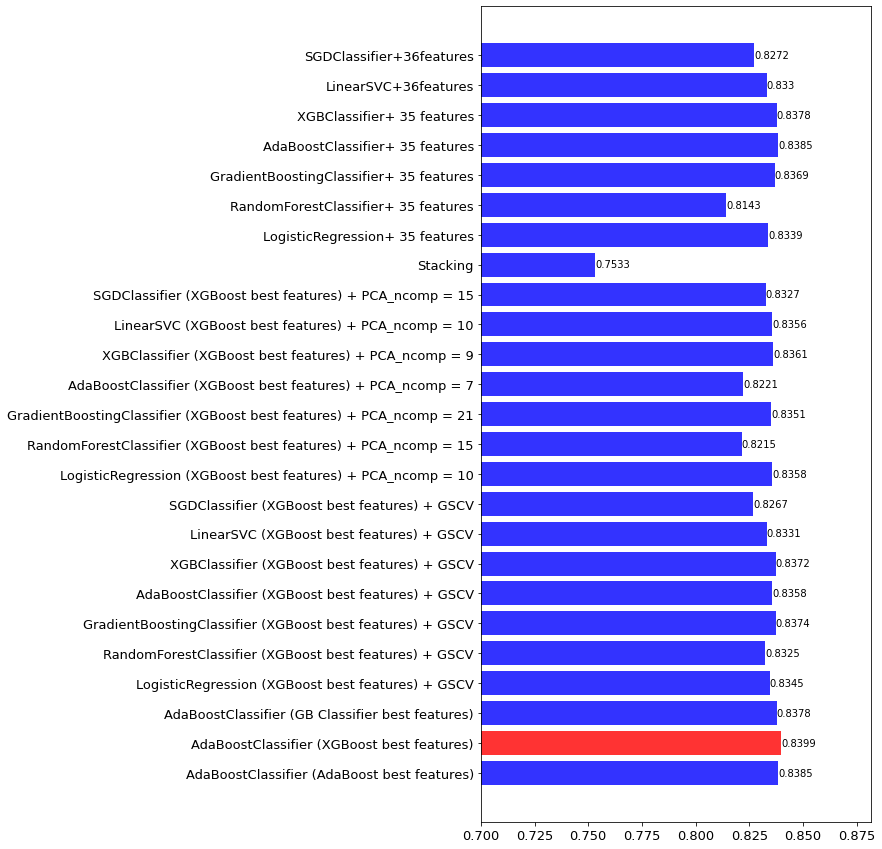

In [ ]:
# Визуализируем результат
plt.figure(figsize=(7, 15))
colors = ['b' if (x < best_modeling_results.AUC.max()) else 'r' 
          for x in best_modeling_results.AUC]
plt.barh(y=best_modeling_results.model_type, width=best_modeling_results.AUC, 
         color=colors,alpha=0.8)
plt.xlim(left=0.7)
# подпись баров
for x_axis, y_axis, text in zip(best_modeling_results.AUC, 
                     best_modeling_results.model_type, 
                     best_modeling_results.AUC):
    t = plt.text(x_axis, y_axis, round(text, 4), horizontalalignment='left', 
                 verticalalignment='center', fontdict={'color':'black'})
plt.tick_params(labelsize=13)
plt.grid(b=False)
plt.show()

Видим, что модель AdaBoostClassifier с наиболее важными для XGBoost классификатора признаками с базовыми гиперпарамметрами - модель с наилучшим скором.<br>
Но в целом можно сказать, что качество (auc_roc_score) большинства моделей  одинаковое. В данном случае необходимо оценивать по другим параметрам: другие метрики, время обучения, удовлетворение бизнес-задачи.

## Для проверки:
Выведем лучшую модель.

In [ ]:
# Вызов библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загрузка данных
# df_telecom_users = pd.read_csv('telecom_users.csv')
df_telecom_users = pd.read_csv('/content/drive/My Drive/Colab Notebooks/telecom_users.csv')
df_telecom_users = df_telecom_users.drop('Unnamed: 0', axis=1)

# Преобразование типов данных столбца SeniorCitizen
df_telecom_users.at[df_telecom_users['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
df_telecom_users.at[df_telecom_users['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'

# Заполнение ячеек в столбце TotalCharges 
df_telecom_users.TotalCharges[
    df_telecom_users.TotalCharges == ' '
] = df_telecom_users.MonthlyCharges[
    df_telecom_users.TotalCharges == ' '
] * df_telecom_users.tenure[
    df_telecom_users.TotalCharges == ' '
]
df_telecom_users.TotalCharges = df_telecom_users.TotalCharges.astype('float')

# Почистим данные от несущественного признака
df_telecom_users = df_telecom_users.drop('customerID', axis=1)

# Список количественных признаков
quantity_columns = df_telecom_users.describe(include='number').columns

# Показатели качеcтвенных признаков
quality_data_describe = df_telecom_users.describe(include=['object'])
# Список качественных признаков
quality_columns = quality_data_describe.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler

# кодирование бинарных категориальных признаков
binary_data = df_telecom_users[[column for column in quality_columns if quality_data_describe[column]['unique'] == 2]]
binary_data_encoded = pd.DataFrame()
for column in binary_data.columns:
    label_e = LabelEncoder()
    label_e = label_e.fit(binary_data[column])
    binary_data_encoded[column] = label_e.transform(binary_data[column])

# кодирование небинарных категориальных признаков 
nonbinary_data = df_telecom_users[[column for column in quality_columns if quality_data_describe[column]['unique'] != 2]]
nonbinary_data_encoded = pd.DataFrame()
for column in nonbinary_data.columns:
    one_h_e = OneHotEncoder(sparse=False)
    one_h_e = one_h_e.fit_transform(nonbinary_data[column].values.reshape(-1, 1))
    for i in range(one_h_e.shape[1]):
        nonbinary_data_encoded[f'{column}_{i}'] = [j[i] for j in one_h_e]

# нормирование количественных признаков 
quantitive_data = df_telecom_users[quantity_columns]
quantitive_data_norm = pd.DataFrame(StandardScaler().fit_transform(quantitive_data), columns=quantity_columns)

# склейка трех таблиц
df_telecom_users_encoded = pd.concat((binary_data_encoded, 
                                      nonbinary_data_encoded, 
                                      quantitive_data_norm), axis=1)

In [ ]:
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# объявим объект
adaboost = AdaBoostClassifier(random_state=17)

# объявим Х, y и отберем фичи
y = df_telecom_users_encoded['Churn']
X = df_telecom_users_encoded.drop('Churn', axis=1)
X['MonthlyCharges^2'] = X['MonthlyCharges']**2 # успех
X['TotalCharges^2'] = X['TotalCharges']**2 # успех
top_feature = ['Contract_0', 'MonthlyCharges', 'OnlineSecurity_0', 
               'InternetService_1', 'Contract_1', 'tenure', 'TechSupport_0', 
               'Contract_2', 'PaymentMethod_2', 'PaperlessBilling', 'TotalCharges', 
               'OnlineBackup_0', 'MultipleLines_0', 'StreamingMovies_2', 'Partner', 
               'SeniorCitizen', 'StreamingTV_2', 'PhoneService', 'TotalCharges^2', 
               'Dependents', 'MonthlyCharges^2', 'PaymentMethod_1', 'PaymentMethod_3']
X = X[top_feature]

# разобьем на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# объявим датафрейм для хранения результатов моделирования
modeling_results = pd.DataFrame(columns=['model_type', 'AUC'])
# обучаем
adaboost_model = adaboost.fit(x_train, y_train)
# считаем скор
probas = adaboost_model.predict_proba(x_test)
auc = roc_auc_score(y_test, probas[:, 1])
modeling_results.loc[0] = [adaboost_model.__class__.__name__, auc]
modeling_results

,model_type,AUC
0,AdaBoostClassifier,0.839901
